Shauna Smith

Bellevue University - DSC630

Professor: Andrew Hua

Week4 "Descriptive Modeling K-means Clustering"

# Objective

Dataset = "https://content.bellevue.edu/cst/dsc/630/als_data.csv"

This data gives anonymized data on ALS patients. With this data, complete the following steps:
Remove any data that is not relevant to the patient’s ALS condition.

* Apply a standard scalar to the data.

* Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

* Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

* Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

* Fit a PCA transformation with two features to the scaled data.

* Make a scatterplot the PCA transformed data coloring each point by its cluster value.

* Summarize your results and make a conclusion.

You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

In [1]:
#loading the dataframe
import pandas as pd

In [144]:
df=pd.read_csv("https://content.bellevue.edu/cst/dsc/630/als_data.csv")

In [145]:
# Familiarize with df & shape
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [146]:
df.shape

(2223, 101)

In [147]:
#dropping any duplicates
df=df.drop_duplicates()

In [148]:
#removing missing values
df=df.dropna()

In [150]:
#remove unique irrelevant variables
df=df.drop(['ID','SubjectID'], axis=1)

In [151]:
#correlation matrice and seeking to remove redundant
matrix = df.corr()
print(matrix)

                 Age_mean  Albumin_max  Albumin_median  Albumin_min  \
Age_mean         1.000000    -0.276195       -0.349024    -0.297121   
Albumin_max     -0.276195     1.000000        0.780141     0.596662   
Albumin_median  -0.349024     0.780141        1.000000     0.761269   
Albumin_min     -0.297121     0.596662        0.761269     1.000000   
Albumin_range    0.053197     0.223350       -0.091822    -0.369015   
...                   ...          ...             ...          ...   
trunk_min        0.065092     0.042903        0.072317     0.134409   
trunk_range      0.036559    -0.064183       -0.088370    -0.114685   
Urine.Ph_max    -0.001532     0.075413        0.056894     0.034555   
Urine.Ph_median  0.002561    -0.046885       -0.042497    -0.001877   
Urine.Ph_min    -0.008615    -0.138430       -0.118506    -0.049783   

                 Albumin_range  ALSFRS_slope  ALSFRS_Total_max  \
Age_mean              0.053197     -0.015301          0.049054   
Albumin_max    

In [152]:
dataCorr = matrix[abs(matrix) >= .9].stack().reset_index()
dataCorr

,level_0,level_1,0
0,Age_mean,Age_mean,1.0
1,Albumin_max,Albumin_max,1.0
2,Albumin_median,Albumin_median,1.0
3,Albumin_min,Albumin_min,1.0
4,Albumin_range,Albumin_range,1.0
...,...,...,...
104,trunk_min,trunk_min,1.0
105,trunk_range,trunk_range,1.0
106,Urine.Ph_max,Urine.Ph_max,1.0
107,Urine.Ph_median,Urine.Ph_median,1.0


In [154]:
#Review of remaining variables
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]
dataCorr

,level_0,level_1,0
56,Hematocrit_max,Hematocrit_median,0.991182
57,Hematocrit_max,Hematocrit_min,0.971646
58,Hematocrit_median,Hematocrit_max,0.991182
60,Hematocrit_median,Hematocrit_min,0.984224
61,Hematocrit_min,Hematocrit_max,0.971646
62,Hematocrit_min,Hematocrit_median,0.984224
74,mouth_max,mouth_median,0.907506
75,mouth_median,mouth_max,0.907506
83,Platelets_median,Platelets_min,0.930895
84,Platelets_min,Platelets_median,0.930895


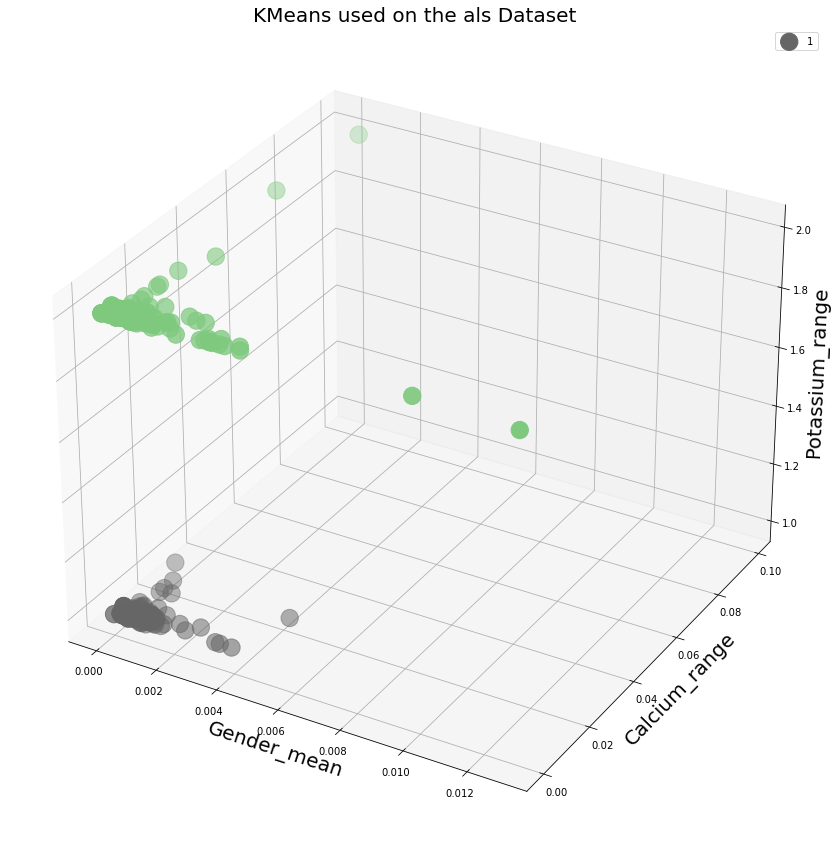

In [155]:
# This is a run for selective features based on Marthoz, Frederic 
# from the Analytics Vidhya article here https://medium.com/analytics-vidhya/k-means-algorithm-in-4-parts-4-4-42bc6c781e46
# I am choosing to experiment with this graphic selection as a supportive silhouette_score to kmeans. 

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
# Params
kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
maxvars=3
kmin=2
kmax=8

cols=list(df.columns)
results_for_each_k=[]
vars_for_each_k={}
#apply to list
for k in range(kmin,kmax+1):
    selected_variables=[]
    while(len(selected_variables)<maxvars):
        results=[]
        for col in cols:
            scols=[]
            scols.extend(selected_variables)
            scols.append(col) 
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(df[scols])
            results.append(silhouette_score(df[scols], kmeans.predict(df[scols])))
        selected_var=cols[np.argmax(results)]
        selected_variables.append(selected_var)
        cols.remove(selected_var)
    results_for_each_k.append(max(results))
    vars_for_each_k[k]=selected_variables


best_k=np.argmax(results_for_each_k)+kmin
#force a value for k
#best_k=3
selected_variables=vars_for_each_k[best_k]
kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
kmeans.fit(df[selected_variables])
clusters=kmeans.predict(df[selected_variables])

%matplotlib inline

fig = plt.figure(figsize=(15,15))
#plot.with Params
ax = plt.axes(projection="3d")
z_points = df[selected_variables[0]]
x_points = df[selected_variables[1]]
y_points = df[selected_variables[2]]
f1=ax.scatter3D(x_points, y_points, z_points, c=clusters,cmap='Accent',s=300);

ax.set_xlabel(selected_variables[0],fontsize = 20)
ax.set_ylabel(selected_variables[1],fontsize = 20)
ax.set_zlabel(selected_variables[2],fontsize = 20)
ax.legend(clusters)
   
plt.title('KMeans used on the als Dataset', fontsize=20)
plt.show()


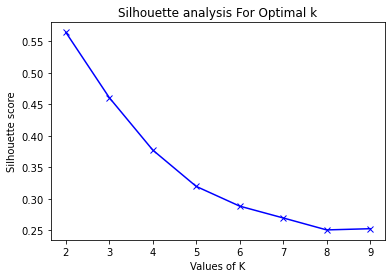

In [185]:
#To visualize df's standalone silhouette as a run on optimal k ranged 1 through 9
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans to run range with df
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 cluster_labels = kmeans.labels_
 
 # silhouette score in graph
 silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [158]:
#Model prep with StandardScalar to verify optimal clusters measured with SSE(Summ of Squared Error)
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

scale= StandardScaler()

scaled_df = scale.fit_transform(df)

In [159]:
#setting parameters and again threads=9
os.environ["OMP_NUM_THREADS"] = '9'
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

In [160]:
#printable list
listP = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    listP.append(kmeans.inertia_)

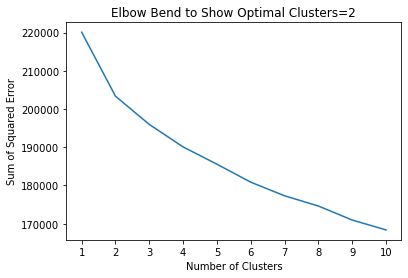

In [161]:
#Show list
#visualize results=(shows the "elbow bend" at 2 clusters)
plt.plot(range(1, 11), listP)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.title("Elbow Bend to Show Optimal Clusters=2")
plt.show()

In [162]:
#Performing an optimal k=2 model to scaled_df
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

kmeans.fit(scaled_df)

#Creating a variable to hold cluster containment assignment of scaled k=2 cluster optimizations
kmeans.labels_
df['cluster'] = kmeans.labels_

In [165]:
# a summary review of the variable positions and expectations at a glance
df.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,...,136.755061,0.015000,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221,0.500675
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,...,2.715247,0.009283,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222,0.500112
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,...,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000
25%,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,0.014035,...,135.000000,0.010582,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000,0.000000
50%,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,0.023297,...,137.000000,0.013123,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000,1.000000
75%,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,0.034799,...,138.000000,0.017278,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000,1.000000
max,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,0.117647,...,145.000000,0.142857,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000,1.000000


In [166]:
#Data generation with parameters to fit a PCA transformation with 'two features' to the scaled data.

#Running a scaled logistic Regression model with score value
x=scaled_df
y=df.cluster

x_scaled=scale.fit_transform(x)

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
model=LogisticRegression()
model.fit(x_train, y_train)
#Getting a "base score"
model.score(x_test, y_test)

0.9842696629213483

In [171]:
#setting PCA model
from sklearn.decomposition import PCA

In [172]:
#Setting with 'two features'(2 components)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

In [174]:
x_pca.shape

(2223, 2)

In [176]:
#splitting
x_pca_train, x_pca_test,y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [177]:
#fitting
model.fit(x_pca_train,y_train)

LogisticRegression()

In [178]:
#We have improvements to the score by .23% from base
model.score(x_pca_test, y_test)

0.9865168539325843

In [179]:
#Creating PCA scatterplot with color distinction
import plotly.express as px

In [182]:
#Using the 2 pca values with k-means cluster variable as the color distinction
fig = px.scatter(x_pca, x=0, y=1, color=df['cluster'])

fig.show()

# Summary & Conclusions

The provided "als_dataset" was assumptively comprised of patients diagnosed with als at some stage or another. Meaning for the purposes of descriptive modeling, we are assessing all positively collected features with their given impact as a real-world correlation to an als diagnosis. The question then becomes, which of these data points offer the greatest training aspects for a predictive model yielding higher accuracy? Therefore, if our goal is to achieve the greatest accuracy knowing which of these groupings provides the greatest cluster formations, we can garner the most predictable transformations as pertinent to their corresponding distances or variance. Throughout this process there was a structured manner in which to achieve this objective via the analysis methods of comparing. First, by removing the irrelevant and examined redundant variables, we both familiarize and improve the itterations needed for processing time. Then through the datapoint relationships and analysis confirmations including next steps that involved evaluating each euclidean distance and running K-means on selected variables against the silhouette_scores ranged up to 9 as allowences. This aspect then allowed for a forced "best features selection down to "3 best_K" which were plotted in 3d graph visual display.

Next, we ran a comparative analysis using the k-mens inertia to find the best cluster grouping. In this case the dataset optimizes with the "elbow" at 2. This was then used to compulate a model with PCA given n_components=2. Ultimately, we were able to assign a score of approx. 98.65% to our model with 2 predictive PCA features targeted by our K-means cluster variables that we created from the overall dataset.

In conclusion, the most amazing aspect derived from this exercise was to see how the spatial relationships of correlatted distances as variances amongst the self appointed datapoints inculcate their pertinence to the overall assumptions hidden within the dataset as a whole. I suppose the saying all things work together for the greater glory really holds true yet again, using the sum of the parts to determine the whole proves as a great defining delineator, even for als diagnosis. 

# References


Abbot, D. (2014) Applied Predictive Analytics. John Wiley & Sons, Inc.


Banerji, A. (May 18, 2021) K-Mean: Getting the Optimal Number of Clusters. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/


Marthoz, F. (Jul 10, 2021) Feature Selection for K-means. Analytics Vidhya. https://medium.com/analytics-vidhya/k-means-algorithm-in-4-parts-4-4-42bc6c781e46


Sharma, P. (Apr 26, 2021) K Means Clustering | Step-by-Step Tutorials for Clustering in Data Analysis. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
